In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as sps
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
sns.set_style("darkgrid")

In [2]:
file = pd.read_csv("data.csv")
columns = file.columns[8:15]
time_labels = [0, 995, 4844, 8757, 12635, 16102, 19470]
time_check = 19470
low_limit = .665
high_limit = .71
train, test = train_test_split(file, test_size=0.2, random_state=42)

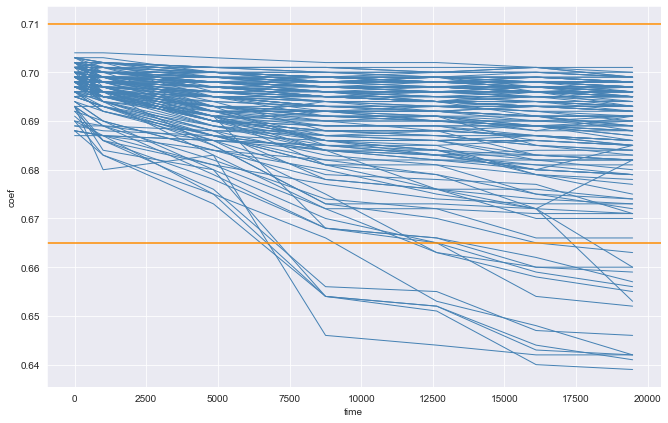

In [3]:
plt.figure(figsize=(11, 7))
for i in range(file.shape[0]):
    data_part = file[columns].iloc[i]
    data_part = np.array(data_part)
    plt.title('')
    plt.xlabel('time')
    plt.ylabel('coef')
    plt.plot(time_labels, data_part, color='steelblue', linewidth=1)
plt.axhline(y=low_limit, xmin=0, xmax=1, color='darkorange', linewidth=1.5)
plt.axhline(y=high_limit, xmin=0, xmax=1, color='darkorange', linewidth=1.5)

In [4]:
mean = []
std = []
for i in range(8, 15):
    data = np.array(train[train.columns[i]])
    mean.append(data.mean())
    std.append(data.std())

In [5]:
print(mean)
print(std)

[0.6980902255639098, 0.6963007518796993, 0.6930225563909774, 0.6895338345864661, 0.688593984962406, 0.6871503759398495, 0.6861353383458647]
[0.0034476943295081203, 0.0044805091050785515, 0.006411298960984462, 0.010914947240636153, 0.0119453880073604, 0.013830062189282458, 0.014478286544909196]


In [6]:
mean = np.array(mean)
std = np.array(std)
time_labels_np = np.array(time_labels).reshape(-1, 1)

[0.69664023 0.69604367 0.69373593 0.69138983 0.68906471 0.68698602
 0.68496668]


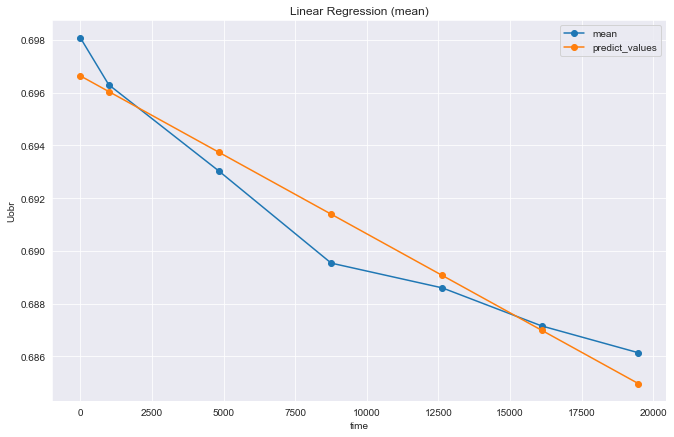

In [7]:
model_mean = LinearRegression()
model_mean.fit(time_labels_np, mean)
mean_coef = model_mean.coef_[0]
predict_values = model_mean.predict(time_labels_np)
plt.figure(figsize=(11, 7))
plt.title('Linear Regression (mean)')
plt.xlabel('time')
plt.ylabel('Uobr')
plt.plot(time_labels, mean, label="mean", marker="o")
plt.plot(time_labels, predict_values, label="predict_values", marker="o")
plt.legend()
print(predict_values)

[0.00404273 0.00463224 0.00691267 0.00923102 0.01152863 0.01358273
 0.01557818]


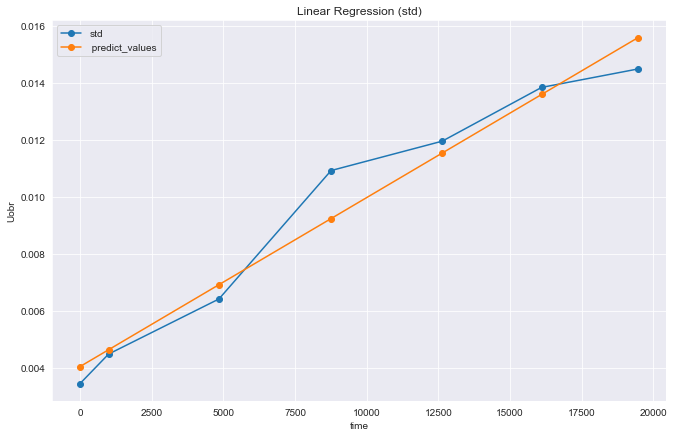

In [8]:
model_std = LinearRegression()
model_std.fit(time_labels_np, std)
std_coef = model_std.coef_[0]
predict_values = model_std.predict(time_labels_np)
plt.figure(figsize=(11, 7))
plt.title('Linear Regression (std)')
plt.xlabel('time')
plt.ylabel('Uobr')
plt.plot(time_labels, std, label="std", marker="o")
plt.plot(time_labels, predict_values, label=" predict_values", marker="o")
plt.legend()
print(predict_values)

In [9]:
mean_test_time0 = test[columns[0]].mean()
std_test_time0 = test[columns[0]].std()
print(mean_test_time0, std_test_time0)
mean_test = mean_test_time0 + mean_coef * time_check
std_test = std_test_time0 + std_coef * time_check

0.6980588235294117 0.003575515868443342


In [10]:
working = test.shape[0]
for i in test[columns[6]]:
    if i < low_limit or i > high_limit:
        working -= 1
test_working_experiment = working / test.shape[0]

test_working_predict = sps.norm(loc=mean_test, scale=std_test).cdf(high_limit) - sps.norm(loc=mean_test, scale=std_test).cdf(low_limit)

test_error = abs((test_working_predict - test_working_experiment) / test_working_experiment)

In [11]:
print("Реальное значение:", test_working_experiment)
print("Прогноз:", test_working_predict)
print("Памылка:", test_error)

Реальное значение: 0.9705882352941176
Прогноз: 0.8624420920309117
Памылка: 0.11142329911966671


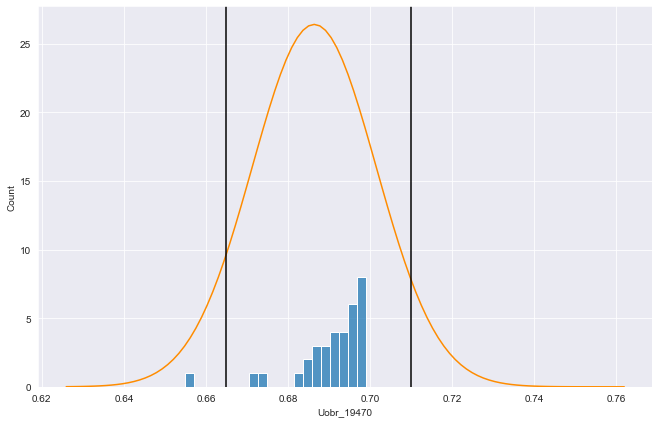

In [12]:
plt.figure(figsize=(11, 7))
sns.histplot(test[columns[6]], bins=20)
x = np.linspace(mean_test - 4 * std_test, mean_test + 5 * std_test, 100)
plt.plot(x, sps.norm(loc=mean_test, scale=std_test).pdf(x), color='darkorange')
plt.axvline(low_limit, 0, 1, color='k')
plt.axvline(high_limit, 0, 1, color='k')
